In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install xgboost
!pip install imblearn
!pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

## 결측치 처리 후 만든 데이터 불러오기

In [2]:
data = pd.read_excel('data/processed_data.xlsx')

In [3]:
data

,Unnamed: 0,매출채권회전율변동,재고자산회전율변동,대손충당금율변동,유동비율,유동비율변동,부채비율,부채비율변동,영업활동현금흐름이자보상비율,금융비용_매출액비율,...,총종차,매종차,오류수정및회계정책변경여부,자산총계,비상장,상장,상장관리,BIG4여부,당기감사법인변동여부,비적정여부
0,0,-0.216645,-0.009839,0.000000,128.39,0.528223,361.81000,2.028765,-0.720000,1.08000,...,11.12,22.93,0,24.217976,1,0,0,0,1,1
1,1,-0.706949,2.679380,3.455094,110.07,0.718051,391.98000,2.635691,84.830000,0.06000,...,191.56,16.66,0,23.759990,1,0,0,0,1,1
2,2,-0.469072,1.632373,3.455094,128.86,1.170710,197.85000,0.504745,-7.550000,0.10000,...,7.55,5.38,0,23.878219,1,0,0,0,0,0
3,3,-0.011327,0.079725,3.455094,133.70,1.037560,136.43000,0.689563,65.620000,0.13000,...,145.59,143.79,0,23.691609,1,0,0,0,1,0
4,4,0.243678,-0.057018,0.773256,86.43,1.296969,5794.77366,1.933965,14990.272230,17.26348,...,28.85,29.82,0,24.211416,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183725,183725,-0.005277,-0.003170,0.969011,292.61,1.207585,46.20000,0.775688,33913.090387,17.26348,...,9.26,6.80,0,24.257440,1,0,0,1,0,0
183726,183726,0.025199,-0.007949,0.812777,275.74,0.942346,54.51000,1.179870,37339.697905,17.26348,...,0.74,1.49,0,24.394284,1,0,0,1,0,0
183727,183727,-0.027167,-0.088141,0.865167,297.24,1.077972,45.13000,0.827921,116338.565091,17.26348,...,6.72,6.77,0,24.426058,1,0,0,1,0,0
183728,183728,0.013298,0.079086,1.046623,296.69,0.998150,54.34000,1.204077,45.400000,0.18000,...,14.52,5.54,0,24.568740,1,0,0,1,0,0


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data.columns = ['ARTOpc', 'APTOpc', 'ABDpc', 'CR', 'CRpc', 'DR',
       'DRpc', 'OCFICR', 'INTSR', 'Cre', 'ROE',
       'ROEpc', 'ROA', 'ROApc', 'Defi', 'SG', 'AQ', 'AQpc',
       'Deppc', 'SGA', 'SGApc', 'TATA', 'TATApc', 'EBITOCFd', 'TAEd', 'SEd',
       'EC', 'TA', 'KRXC_private', 'KRXC_public', 'KRXC_black', 'Big4', 'AC',
       'AO']

In [6]:
data.head()

,ARTOpc,APTOpc,ABDpc,CR,CRpc,DR,DRpc,OCFICR,INTSR,Cre,...,TAEd,SEd,EC,TA,KRXC_private,KRXC_public,KRXC_black,Big4,AC,AO
0,-0.216645,-0.009839,0.000000,128.39,0.528223,361.81000,2.028765,-0.72000,1.08000,6.0,...,11.12,22.93,0,24.217976,1,0,0,0,1,1
1,-0.706949,2.679380,3.455094,110.07,0.718051,391.98000,2.635691,84.83000,0.06000,6.0,...,191.56,16.66,0,23.759990,1,0,0,0,1,1
2,-0.469072,1.632373,3.455094,128.86,1.170710,197.85000,0.504745,-7.55000,0.10000,5.0,...,7.55,5.38,0,23.878219,1,0,0,0,0,0
3,-0.011327,0.079725,3.455094,133.70,1.037560,136.43000,0.689563,65.62000,0.13000,4.0,...,145.59,143.79,0,23.691609,1,0,0,0,1,0
4,0.243678,-0.057018,0.773256,86.43,1.296969,5794.77366,1.933965,14990.27223,17.26348,9.0,...,28.85,29.82,0,24.211416,1,0,0,0,1,1


# 데이터를 train set 과 test set으로 나누기
## - over sampling을 통해 불균형 데이터 문제 해결

In [7]:
# Use a utility from sklearn to split and shuffle our dataset.
full_data = data.copy()
y = full_data.pop('AO')
X = full_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=y)

In [8]:
y_train.value_counts()

0    121621
1      6990
Name: AO, dtype: int64

In [9]:
from imblearn.over_sampling import *
smote = SMOTE()
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

## 정확도, 재현율, auc 함수

In [10]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

In [11]:
def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    print('정확도: {:.2f}'.format(accuracy))
    print('재현율: {:.2f}'.format(recall))
    print('auc: {:.2f}'.format(auc))

## Random Forest

#### raw dataset 정답 분포

In [12]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 183730
    Positive: 9985 (5.43% of total)



In [13]:
# Random Forest w/ giving weights to classes
weight_for_0 = (1 / neg)*(total)/2.0
weight_for_1 = (1 / pos)*(total)/2.0

class_weights = {0: weight_for_0, 1: weight_for_1}

rf_clf = RandomForestClassifier(n_estimators = 500, max_depth = 7, class_weight=class_weights)
rf_clf.fit(X_train, y_train)
recall_rf = recall_score(y_test, rf_clf.predict(X_test))
get_clf_eval(y_test, rf_clf.predict(X_test))

정확도: 0.85
재현율: 0.84
auc: 0.84


In [14]:
xgb_clf = XGBClassifier(booster='dart', rate_drop=0.2, alpha=0.5, eval_metric='logloss', n_estimators=200,
                        max_depth=4, eta=0.2, colsample_bytree=0.9, subsample=0.8, max_delta_step = 1, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
recall_xgb = recall_score(y_test, xgb_clf.predict(X_test))
get_clf_eval(y_test, xgb_clf.predict(X_test))

정확도: 0.95
재현율: 0.09
auc: 0.54


#### over sampling 후 정답 분포

In [15]:
neg, pos = np.bincount(y_train_over)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 243242
    Positive: 121621 (50.00% of total)



In [16]:
# Random Forest with oversampling(Smote)

rf_clf2 = RandomForestClassifier(n_estimators = 500, max_depth = 7)
rf_clf2.fit(X_train_over, y_train_over)
recall_over_rf = recall_score(y_test, rf_clf2.predict(X_test))
get_clf_eval(y_test, rf_clf2.predict(X_test))

정확도: 0.87
재현율: 0.81
auc: 0.84


In [17]:
xgb_clf = XGBClassifier(booster='dart', rate_drop=0.2, alpha=0.5, eval_metric='logloss', n_estimators=200,
                        max_depth=4, eta=0.2, colsample_bytree=0.9, subsample=0.8, max_delta_step = 1, use_label_encoder=False)
xgb_clf.fit(X_train_over, y_train_over)
recall_over_xgb = recall_score(y_test, xgb_clf.predict(X_test))
get_clf_eval(y_test, xgb_clf.predict(X_test))

정확도: 0.87
재현율: 0.78
auc: 0.83


## 다중공선성 확인 후 컬럼 제거

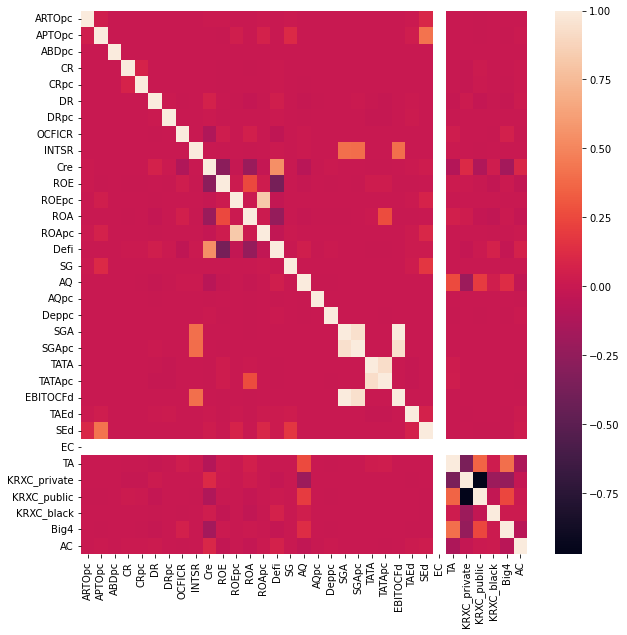

In [18]:
full_data = data.copy()
full_data.drop('AO', axis = 1, inplace = True) # AO: 비적적여부 -> label
corrMatrix = full_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix, xticklabels=True, yticklabels=True)
plt.show()

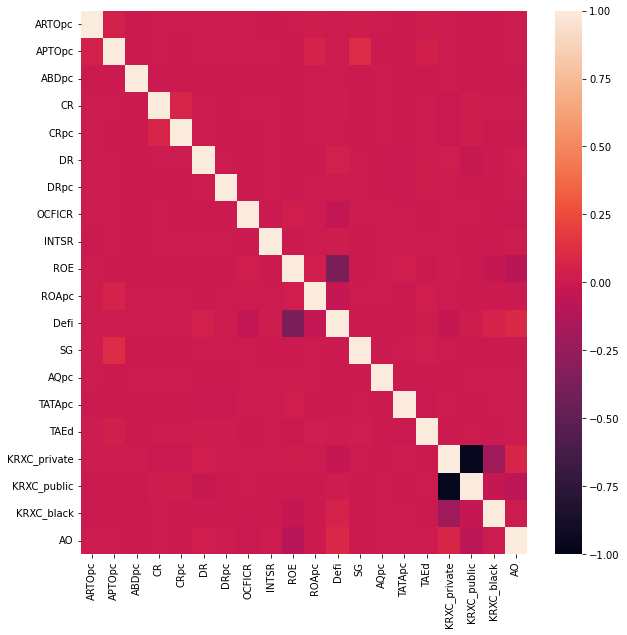

In [19]:
cleaned_data = data.copy()
# cleaned_data.drop(['KRXC_private', 'KRXC_black', 'AO'], axis = 1, inplace = True) # drop two of one-hot encoding columns and label
cleaned_data.drop(['SGA', 'TATA', 'EBITOCFd','EC','Cre','Deppc','ROA','ROEpc','AQ', 'SGApc', 'SEd', 'Big4','AC','TA'], axis = 1, inplace=True) # drop columns according to the correlation matrix
corrMatrix = cleaned_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrMatrix, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)
plt.show()

# 데이터를 train set 과 test set으로 나누기
## - over sampling을 통해 불균형 데이터 문제 해결

In [20]:
# Use a utility from sklearn to split and shuffle our dataset.

y = cleaned_data.pop('AO')
X = cleaned_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=y) 

In [21]:
X_train.columns

Index(['ARTOpc', 'APTOpc', 'ABDpc', 'CR', 'CRpc', 'DR', 'DRpc', 'OCFICR',
       'INTSR', 'ROE', 'ROApc', 'Defi', 'SG', 'AQpc', 'TATApc', 'TAEd',
       'KRXC_private', 'KRXC_public', 'KRXC_black'],
      dtype='object')

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

## Random Forest

#### raw dataset 정답 분포

In [23]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 183730
    Positive: 9985 (5.43% of total)



In [24]:
# Random Forest w/ giving weights to classes
weight_for_0 = (1 / neg)*(total)/2.0
weight_for_1 = (1 / pos)*(total)/2.0

class_weights = {0: weight_for_0, 1: weight_for_1}

rf_clf = RandomForestClassifier(n_estimators = 500, max_depth = 7, class_weight=class_weights)
rf_clf.fit(X_train, y_train)
recall_processed_rf = recall_score(y_test, rf_clf.predict(X_test))
get_clf_eval(y_test, rf_clf.predict(X_test))

정확도: 0.76
재현율: 0.73
auc: 0.74


In [25]:
xgb_clf = XGBClassifier(booster='dart', rate_drop=0.2, alpha=0.5, eval_metric='logloss', n_estimators=200,
                        max_depth=4, eta=0.2, colsample_bytree=0.9, subsample=0.8, max_delta_step = 1, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
recall_processed_xgb = recall_score(y_test, xgb_clf.predict(X_test))
get_clf_eval(y_test, xgb_clf.predict(X_test))

정확도: 0.95
재현율: 0.07
auc: 0.54


#### over sampling 후 정답 분포

In [26]:
neg, pos = np.bincount(y_train_over)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 243242
    Positive: 121621 (50.00% of total)



In [28]:
# Random Forest with oversampling(Smote)

rf_clf = RandomForestClassifier(n_estimators = 500, max_depth = 7)
rf_clf.fit(X_train_over, y_train_over)
recall_processed_over_rf = recall_score(y_test, rf_clf.predict(X_test))
get_clf_eval(y_test, rf_clf.predict(X_test))

정확도: 0.78
재현율: 0.67
auc: 0.73


In [29]:
xgb_clf = XGBClassifier(booster='dart', rate_drop=0.2, alpha=0.5, eval_metric='logloss', n_estimators=200,
                        max_depth=4, eta=0.2, colsample_bytree=0.9, subsample=0.8, max_delta_step = 1, use_label_encoder=False)
xgb_clf.fit(X_train_over, y_train_over)
recall_processed_over_xgb = recall_score(y_test, xgb_clf.predict(X_test))
get_clf_eval(y_test, xgb_clf.predict(X_test))

정확도: 0.77
재현율: 0.65
auc: 0.72


### Result

<AxesSubplot:>

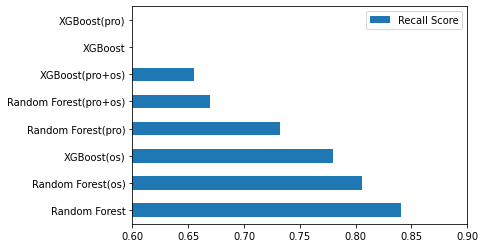

In [30]:
pd.DataFrame([recall_rf, recall_xgb, recall_over_rf, recall_over_xgb, recall_processed_rf, recall_processed_xgb, recall_processed_over_rf, recall_processed_over_xgb],
             index = ['Random Forest', 'XGBoost', 'Random Forest(os)', 'XGBoost(os)','Random Forest(pro)', 'XGBoost(pro)', 'Random Forest(pro+os)', 'XGBoost(pro+os)'],
             columns = ['Recall Score']).sort_values(by = 'Recall Score', ascending = False).plot(kind='barh', xlim = (0.6, 0.9), )

In [35]:
pd.DataFrame([recall_rf, recall_xgb, recall_over_rf, recall_over_xgb, recall_processed_rf, recall_processed_xgb, recall_processed_over_rf, recall_processed_over_xgb],
             index = ['Random Forest', 'XGBoost', 'Random Forest(os)', 'XGBoost(os)','Random Forest(pro)', 'XGBoost(pro)', 'Random Forest(pro+os)', 'XGBoost(pro+os)'],
             columns = ['Recall Score']).sort_values(by = 'Recall Score', ascending = False)


,Recall Score
Random Forest,0.840401
Random Forest(os),0.805676
XGBoost(os),0.779633
Random Forest(pro),0.732554
Random Forest(pro+os),0.669449
XGBoost(pro+os),0.654758
XGBoost,0.086144
XGBoost(pro),0.071786
